In [1]:
import FinanceDataReader as fdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow

<AxesSubplot:xlabel='Date'>

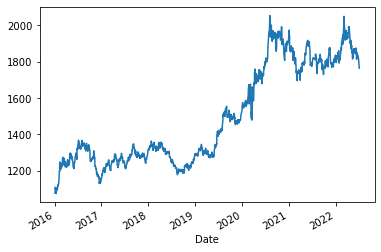

In [2]:
gold = fdr.DataReader('ZG','2016-01-01') # ZG
gold['Close'].plot()

<AxesSubplot:xlabel='Date'>

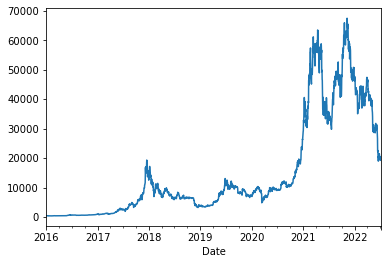

In [3]:
btc = fdr.DataReader('BTC/USD','2016-01-01') # bitfinex
btc['Close'].plot()

In [4]:
print("old columns")
print(gold.columns,btc.columns)

gold.columns = ['Close_gold', 'Open_gold', 'High_gold', 'Low_gold', 'Volume_gold', 'Change_gold']
btc.columns = ['Close_btc', 'Open_btc', 'High_btc', 'Low_btc', 'Volume_btc', 'Change_btc']

print("new columns")
print(gold.columns,btc.columns)

old columns
Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object') Index(['Close', 'Open', 'High', 'Low', 'Volume', 'Change'], dtype='object')
new columns
Index(['Close_gold', 'Open_gold', 'High_gold', 'Low_gold', 'Volume_gold',
       'Change_gold'],
      dtype='object') Index(['Close_btc', 'Open_btc', 'High_btc', 'Low_btc', 'Volume_btc',
       'Change_btc'],
      dtype='object')


In [5]:
temp = pd.merge(btc,gold, how='outer',on='Date')
temp = temp.fillna(method='ffill')
temp = temp.fillna(method='backfill')
temp

,Close_btc,Open_btc,High_btc,Low_btc,Volume_btc,Change_btc,Close_gold,Open_gold,High_gold,Low_gold,Volume_gold,Change_gold
Date,,,,,,,,,,,,
2016-01-01,434.0,430.0,438.0,425.9,46970.0,0.0094,1075.2,1061.5,1083.0,1061.0,159790.0,0.0141
2016-01-02,433.7,434.0,437.4,430.7,33570.0,-0.0006,1075.2,1061.5,1083.0,1061.0,159790.0,0.0141
2016-01-03,430.7,433.7,434.1,423.1,54830.0,-0.0070,1075.2,1061.5,1083.0,1061.0,159790.0,0.0141
2016-01-04,433.3,430.7,435.3,428.6,53010.0,0.0061,1075.2,1061.5,1083.0,1061.0,159790.0,0.0141
2016-01-05,431.2,433.3,435.3,428.9,45030.0,-0.0049,1078.4,1073.5,1081.5,1071.9,104640.0,0.0030
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-02,19243.2,19275.4,19425.4,19006.4,58570.0,-0.0010,1801.5,1808.1,1813.6,1783.4,249490.0,-0.0032
2022-07-03,19309.9,19243.4,19626.4,18794.4,65270.0,0.0035,1801.5,1808.1,1813.6,1783.4,249490.0,-0.0032
2022-07-04,20215.8,19310.6,20303.8,19052.5,92790.0,0.0469,1801.5,1808.1,1813.6,1783.4,249490.0,-0.0032


In [6]:
temp.keys()

Index(['Close_btc', 'Open_btc', 'High_btc', 'Low_btc', 'Volume_btc',
       'Change_btc', 'Close_gold', 'Open_gold', 'High_gold', 'Low_gold',
       'Volume_gold', 'Change_gold'],
      dtype='object')

In [7]:
df = temp
scaler = MinMaxScaler()
scale_cols = ['Close_btc', 'Open_btc', 'High_btc', 'Low_btc', 'Volume_btc',
       'Change_btc', 'Close_gold', 'Open_gold', 'High_gold', 'Low_gold',
       'Volume_gold', 'Change_gold']
df_scaled = scaler.fit_transform(df[scale_cols])
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = scale_cols

df_scaled

,Close_btc,Open_btc,High_btc,Low_btc,Volume_btc,Change_btc,Close_gold,Open_gold,High_gold,Low_gold,Volume_gold,Change_gold
0,0.000983,0.000923,0.000905,0.001144,0.000010,0.619710,0.001631,0.000000,0.001494,0.000000,0.195684,0.582721
1,0.000978,0.000983,0.000896,0.001217,0.000007,0.604263,0.001631,0.000000,0.001494,0.000000,0.195684,0.582721
2,0.000934,0.000978,0.000848,0.001102,0.000012,0.594378,0.001631,0.000000,0.001494,0.000000,0.195684,0.582721
3,0.000972,0.000934,0.000866,0.001185,0.000012,0.614612,0.001631,0.000000,0.001494,0.000000,0.195684,0.582721
4,0.000941,0.000972,0.000866,0.001190,0.000010,0.597621,0.004893,0.011989,0.000000,0.011207,0.128141,0.480699
...,...,...,...,...,...,...,...,...,...,...,...,...
2374,0.281049,0.281525,0.277630,0.282733,0.000013,0.603645,0.741998,0.745929,0.729401,0.742751,0.305541,0.423713
2375,0.282042,0.281048,0.280559,0.279520,0.000015,0.610596,0.741998,0.745929,0.729401,0.742751,0.305541,0.423713
2376,0.295531,0.282049,0.290432,0.283432,0.000021,0.677634,0.741998,0.745929,0.729401,0.742751,0.305541,0.423713
2377,0.295304,0.295527,0.296307,0.287416,0.000027,0.603954,0.703670,0.752223,0.730995,0.721777,0.380101,0.218750


In [8]:
TEST_SIZE = 1000
train = df_scaled[:-TEST_SIZE]
test = df_scaled[-TEST_SIZE:]

In [9]:
feature_cols = ['Open_btc', 'High_btc', 'Low_btc', 'Volume_btc',
       'Change_btc', 'Close_gold', 'Open_gold', 'High_gold', 'Low_gold',
       'Volume_gold', 'Change_gold']
label_cols = ['Close_btc']

train_feature = train[feature_cols].values
train_label = train[label_cols].values
train_feature = train_feature.reshape([*train_feature.shape, -1])

test_feature = test[feature_cols].values
test_label = test[label_cols].values
test_feature = test_feature.reshape([*test_feature.shape, -1])


# train, validation set
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)


print(x_train.shape, x_valid.shape)
# (1602, 13, 1) (401, 13, 1)

# # test dataset
# test_feature, test_label = make_dataset(test_feature, test_label, 20)
print(test_feature.shape, test_label.shape)
# (200, 13, 1), (200, 1)

(1103, 11, 1) (276, 11, 1)
(1000, 11, 1) (1000, 1)


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
               input_shape=(train_feature.shape[1], train_feature.shape[2]), 
               activation='relu', 
               return_sequences=False)
          )
model.add(Dense(1))

In [11]:
model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', patience=20)
filename = ('tmp_checkpoint1.h5')

# filename = os.path.join(model_path, 'tmp_checkpoint1.h5')
checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

history = model.fit(x_train, y_train, 
                    epochs=400, 
                    batch_size=16,
                    validation_data=(x_valid, y_valid), 
                    callbacks=[early_stop, checkpoint])

Epoch 1/400
61/69 [=========================>....] - ETA: 0s - loss: 0.0038
Epoch 1: val_loss improved from inf to 0.00300, saving model to tmp_checkpoint1.h5
69/69 [==============================] - 2s 12ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 2/400
58/69 [========================>.....] - ETA: 0s - loss: 0.0028
Epoch 2: val_loss improved from 0.00300 to 0.00212, saving model to tmp_checkpoint1.h5
69/69 [==============================] - 0s 7ms/step - loss: 0.0027 - val_loss: 0.0021
Epoch 3/400
66/69 [===========================>..] - ETA: 0s - loss: 0.0012
Epoch 3: val_loss improved from 0.00212 to 0.00043, saving model to tmp_checkpoint1.h5
69/69 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 4.2697e-04
Epoch 4/400
63/69 [==========================>...] - ETA: 0s - loss: 2.8367e-04
Epoch 4: val_loss improved from 0.00043 to 0.00021, saving model to tmp_checkpoint1.h5
69/69 [==============================] - 0s 5ms/step - loss: 2.7098e-04 - val_loss

66/69 [===========================>..] - ETA: 0s - loss: 8.1121e-06
Epoch 34: val_loss improved from 0.00001 to 0.00001, saving model to tmp_checkpoint1.h5
69/69 [==============================] - 0s 5ms/step - loss: 7.8875e-06 - val_loss: 6.6204e-06
Epoch 35/400
64/69 [==========================>...] - ETA: 0s - loss: 7.9788e-06
Epoch 35: val_loss did not improve from 0.00001
69/69 [==============================] - 0s 6ms/step - loss: 7.9298e-06 - val_loss: 8.3935e-06
Epoch 36/400
62/69 [=========================>....] - ETA: 0s - loss: 9.9405e-06
Epoch 36: val_loss did not improve from 0.00001
69/69 [==============================] - 0s 5ms/step - loss: 9.5937e-06 - val_loss: 1.0497e-05
Epoch 37/400
64/69 [==========================>...] - ETA: 0s - loss: 8.1537e-06
Epoch 37: val_loss did not improve from 0.00001
69/69 [==============================] - 0s 5ms/step - loss: 8.7261e-06 - val_loss: 1.3586e-05
Epoch 38/400
61/69 [=========================>....] - ETA: 0s - loss: 7.4348e

69/69 [==============================] - 0s 5ms/step - loss: 4.5125e-06 - val_loss: 5.7898e-06
Epoch 70/400
62/69 [=========================>....] - ETA: 0s - loss: 4.7899e-06
Epoch 70: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 4.8053e-06 - val_loss: 5.3982e-06
Epoch 71/400
57/69 [=======================>......] - ETA: 0s - loss: 4.0480e-06
Epoch 71: val_loss improved from 0.00000 to 0.00000, saving model to tmp_checkpoint1.h5
69/69 [==============================] - 0s 5ms/step - loss: 3.9952e-06 - val_loss: 3.2360e-06
Epoch 72/400
69/69 [==============================] - ETA: 0s - loss: 3.9039e-06
Epoch 72: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 3.9039e-06 - val_loss: 4.1712e-06
Epoch 73/400
67/69 [============================>.] - ETA: 0s - loss: 4.4289e-06
Epoch 73: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 4.4

69/69 [==============================] - ETA: 0s - loss: 3.8416e-06
Epoch 105: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 3.8416e-06 - val_loss: 4.1879e-06
Epoch 106/400
61/69 [=========================>....] - ETA: 0s - loss: 2.9863e-06
Epoch 106: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 2.8235e-06 - val_loss: 2.9120e-06
Epoch 107/400
64/69 [==========================>...] - ETA: 0s - loss: 2.9655e-06
Epoch 107: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 3.0578e-06 - val_loss: 3.2866e-06
Epoch 108/400
65/69 [===========================>..] - ETA: 0s - loss: 4.0133e-06
Epoch 108: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 3.9275e-06 - val_loss: 2.5301e-06
Epoch 109/400
68/69 [============================>.] - ETA: 0s - loss: 9.0000e-06
Epoch 109: val_loss did not 

Epoch 141/400
60/69 [=========================>....] - ETA: 0s - loss: 2.6254e-06
Epoch 141: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 2.6678e-06 - val_loss: 1.2627e-05
Epoch 142/400
58/69 [========================>.....] - ETA: 0s - loss: 4.4618e-06
Epoch 142: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 4.3205e-06 - val_loss: 3.4595e-06
Epoch 143/400
59/69 [========================>.....] - ETA: 0s - loss: 2.1476e-06
Epoch 143: val_loss improved from 0.00000 to 0.00000, saving model to tmp_checkpoint1.h5
69/69 [==============================] - 0s 5ms/step - loss: 2.1557e-06 - val_loss: 1.7771e-06
Epoch 144/400
60/69 [=========================>....] - ETA: 0s - loss: 2.0028e-06
Epoch 144: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 4ms/step - loss: 2.1811e-06 - val_loss: 3.6258e-06
Epoch 145/400
59/69 [========================>.....] - E

69/69 [==============================] - 0s 5ms/step - loss: 1.5721e-06 - val_loss: 1.7584e-06
Epoch 177/400
68/69 [============================>.] - ETA: 0s - loss: 2.0712e-06
Epoch 177: val_loss improved from 0.00000 to 0.00000, saving model to tmp_checkpoint1.h5
69/69 [==============================] - 0s 5ms/step - loss: 2.1711e-06 - val_loss: 1.3855e-06
Epoch 178/400
62/69 [=========================>....] - ETA: 0s - loss: 2.1537e-06
Epoch 178: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 4ms/step - loss: 2.2978e-06 - val_loss: 6.6734e-06
Epoch 179/400
65/69 [===========================>..] - ETA: 0s - loss: 5.5592e-06
Epoch 179: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - loss: 5.5191e-06 - val_loss: 7.5796e-06
Epoch 180/400
64/69 [==========================>...] - ETA: 0s - loss: 4.6694e-06
Epoch 180: val_loss did not improve from 0.00000
69/69 [==============================] - 0s 5ms/step - l

32/32 [==============================] - 0s 2ms/step


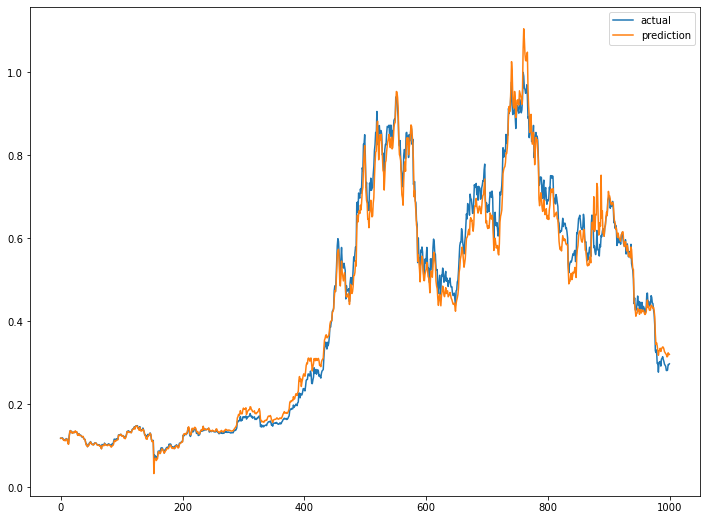

In [13]:
plt.figure(figsize=(12, 9))

pred = model.predict(test_feature)
plt.plot(test_label, label='actual')
plt.plot(pred, label='prediction')
plt.legend()
# plt.show()
plt.savefig('btc_by_gold_dpi1000.png',dpi=1000)